**Nama Kelompok :** Mandalika

**Anggota :**
1. Ardilla Safitri
2. Jonse Kennedy
3. Fakhry Husnul
4. Lise Listianti
5. Riska Diah N
6. Arni Cici Suryani

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Mengubah parameter default matplotlib
Parameter default matplotlib dapat diubah dengan rcParams sebagai berikut


In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 16, 8
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# Load Dataset

In [3]:
df = pd.read_excel('E Commerce Dataset.xlsx')

# 1. Descriptive Statistics

In [4]:
# informasi general tentang dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

**Pengamatan\:**
1. Data terdiri dari 5630 baris
2. Tidak terdapat tipe data dan nama kolom yang kurang sesuai
3. Tampak beberapa kolom masih memiliki null/missing values (Non-Null Count < jumlah baris) diantaranya `Tenure`, `WarehouseToHome`, `HourSpendOnApp`, `OrderAmountHikeFromlastYear`, `CouponUsed`, `OrderCount`, `DaySinceLastOrder`

### Cuplikan Data

In [5]:
# run code ini beberapa kali
df.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
3693,53694,0,1.0,Mobile Phone,1,7.0,COD,Male,3.0,4,Mobile Phone,2,Divorced,6,0,12.0,2.0,2.0,3.0,157.29
4378,54379,0,19.0,Computer,3,13.0,Credit Card,Female,3.0,5,Fashion,1,Single,8,0,13.0,6.0,13.0,NaN,213.65
4595,54596,1,1.0,Mobile Phone,1,22.0,Credit Card,Male,3.0,4,Fashion,3,Married,9,1,13.0,NaN,8.0,8.0,261.10
3658,53659,0,10.0,Computer,3,14.0,E wallet,Female,3.0,2,Laptop & Accessory,5,Divorced,4,0,17.0,6.0,7.0,14.0,171.39
4493,54494,0,17.0,Mobile Phone,1,14.0,Debit Card,Female,3.0,4,Fashion,5,Married,10,0,17.0,2.0,2.0,NaN,224.85


**Pengamatan**
* Sepertinya tidak ada anomali pada setiap entri kolom sudah sesuai

### Statistical Summary

In [6]:
# pengelompokan kolom berdasarkan jenisnya
nums = ['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
cats = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

In [7]:
# ringkasan statistik dari kolom numerik
df[nums].describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


**Pengamatan:**
1. Kolom `churn`, `Tenure`, `WarehouseToHome`, `HourSpendOnApp`, `NumberOfDeviceRegistered`, `SatisfactionScore`, dan `OrderAmountHikeFromlastYear` sudah mendekati distribusi normal (median tidak jauh berbeda dengan mean)
2. Kolom `CityTier`, `NumberOfAddress`, `CouponUsed`, `OrderCount`, `DaySinceLastOrder`, dan `CashbackAmount` tampak skew ke kanan (long-right tail).
3. Kolom `Churn` dan `Complain` ternyata bernilai boolean/binary
4. Tidak ada kolom yang bernilai negatif

In [8]:
# categorical columns 
df[cats].describe()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


**Pengamatan:**
1. Data dinominasi (proporsi lebih dari 50% dari jumlah baris data) oleh penggunaan:
- **Mobile Phone** (`PreferredLoginDevice`)
- **Male** (`Gender`)
- **Married** (`MaritalStatus`)
2. Kolom `PreferredPaymentMode` dan `PreferedOrderCat` memiliki kardinalitas (jumlah unique values) yang lebih tinggi (6-7) dibandingkan kolom lainnya.

## Value Counting
Kita dapat memastikan pengamatan mengenai kolom-kolom categorical di atas dengan value counting

In [9]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom PreferredLoginDevice:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

Value count kolom PreferredPaymentMode:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Value count kolom Gender:
Male      3384
Female    2246
Name: Gender, dtype: int64

Value count kolom PreferedOrderCat:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Value count kolom MaritalStatus:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64



**Pengamatan:**
1. Value count kolom `PreferredLoginDevice`: jumlah Phone sama dengan Mobile Phone sehingga datanya harus digabung
2. Value count kolom `PreferredPaymentMode`: Jumlah Credit Card sama dengan CC dan COD sama dengan Cash on Delivery sehingga datanya harus digabung
3. Value count kolom `PreferredOrderCat`: Jumlah Mobile Phone sama dengan Mobile

## 2. Univariate Analysis
Setelah melakukan analisis sederhana tentang statistik deskriptif, sekarang kita fokus pada satu-persatu kolom dengan *Univariate Analysis*

### Box plots

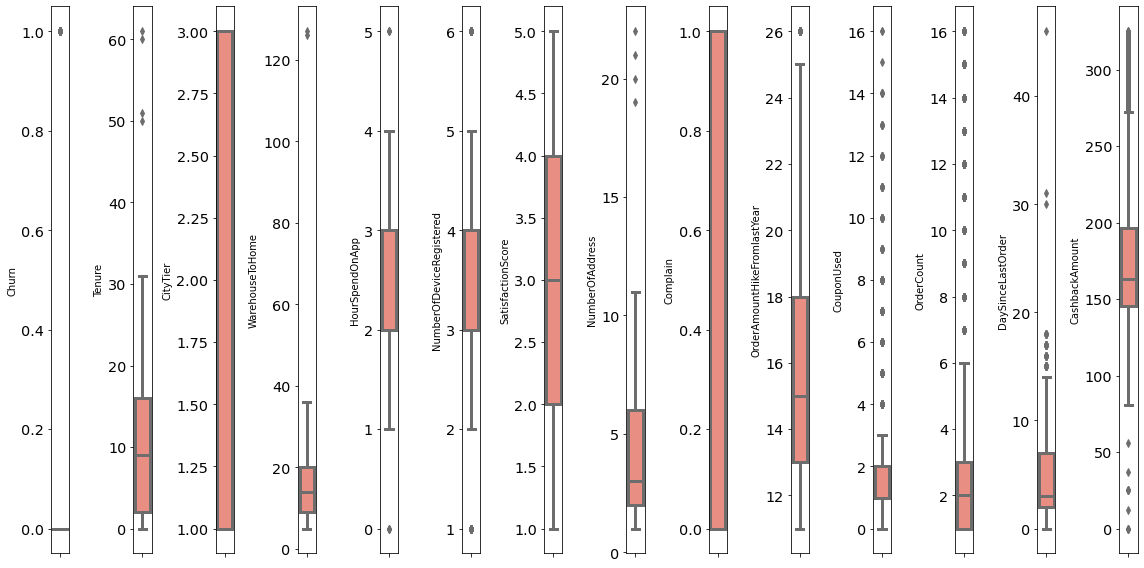

In [10]:
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='salmon', orient='v')
    plt.tight_layout()

Untuk boxplot, hal paling penting yang harus kita perhatikan adalah keberadaan outlier.
1. Outlier terlihat utamanya pada kolom `CouponUsed`, `OrderCount`, `CashbackAmount` dan `DaySinceLastOrder`
2. Dari boxplotnya juga tampak mana distribusi yang terlihat agak *skewed*:  `Tenure`, `WarehouseToHome`, `NumberOfAddress`, `CouponUsed`, `OrderCount`, dan `DaySinceLastOrder`

### Dist plots

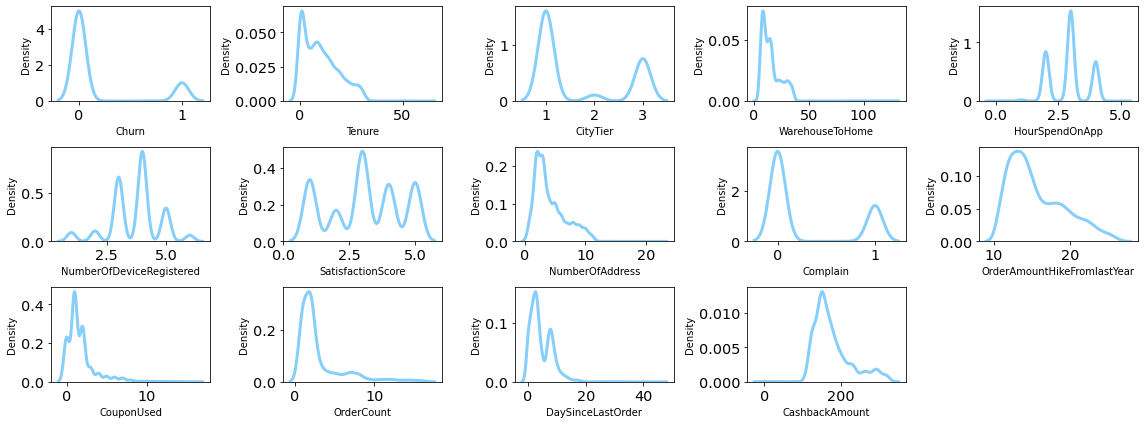

In [11]:
features = nums
plt.figure(figsize=(16, 6))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(x=df[features[i]], color='lightskyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Untuk distribution plot, hal utama yang perlu diperhatikan adalah bentuk distribusi:
* Kolom `HourSpendApp`, `NumberOfDeviceRegistered `, `SatisfactionScore`, dan  `OrderAmountHikeFromlastYear`  tampak sudah mendekati distribusi normal
* Seperti dugaan sebelumnya ketika melihat boxplot di atas, kolom `Tenure`, `WarehouseToHome`, `NumberOfAddress`, `OrderAmountHikeFromlastYear`, `CouponUsed`, `OrderCount`, dan `DaySinceLastOrder` sedikit *skewed*
* Berarti ada kemungkinan kita perlu melakukan sesuatu pada kolom-kolom tersebut nantinya
* Kolom `churn` dan `Complain` merupakan boolean, sehingga tidak perlu terlalu diperhatikan bentuk distribusinya

### Violin plots

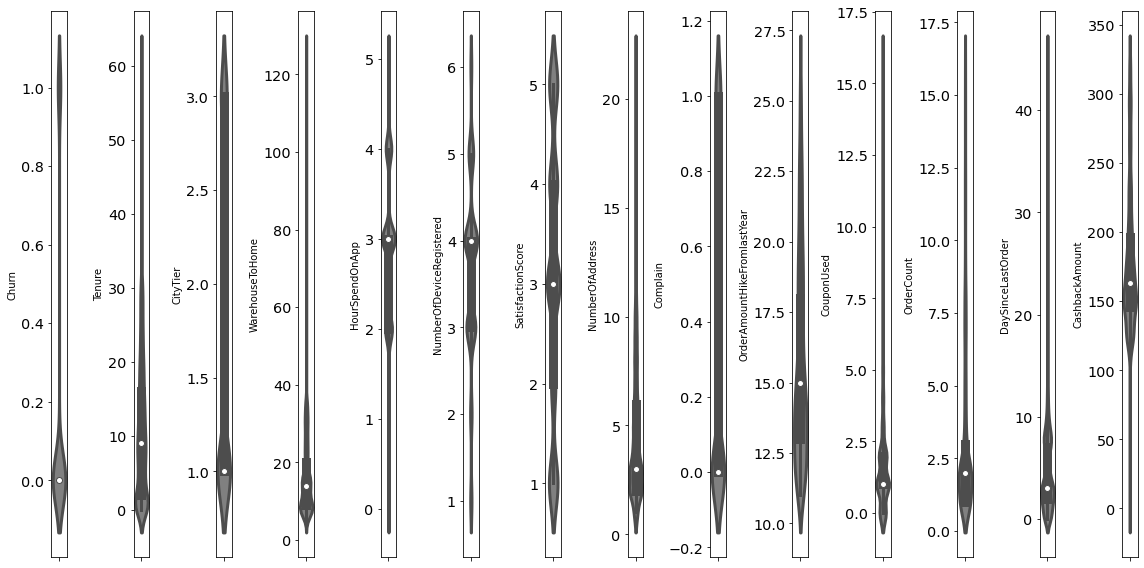

In [12]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

### Count plot (categorical)

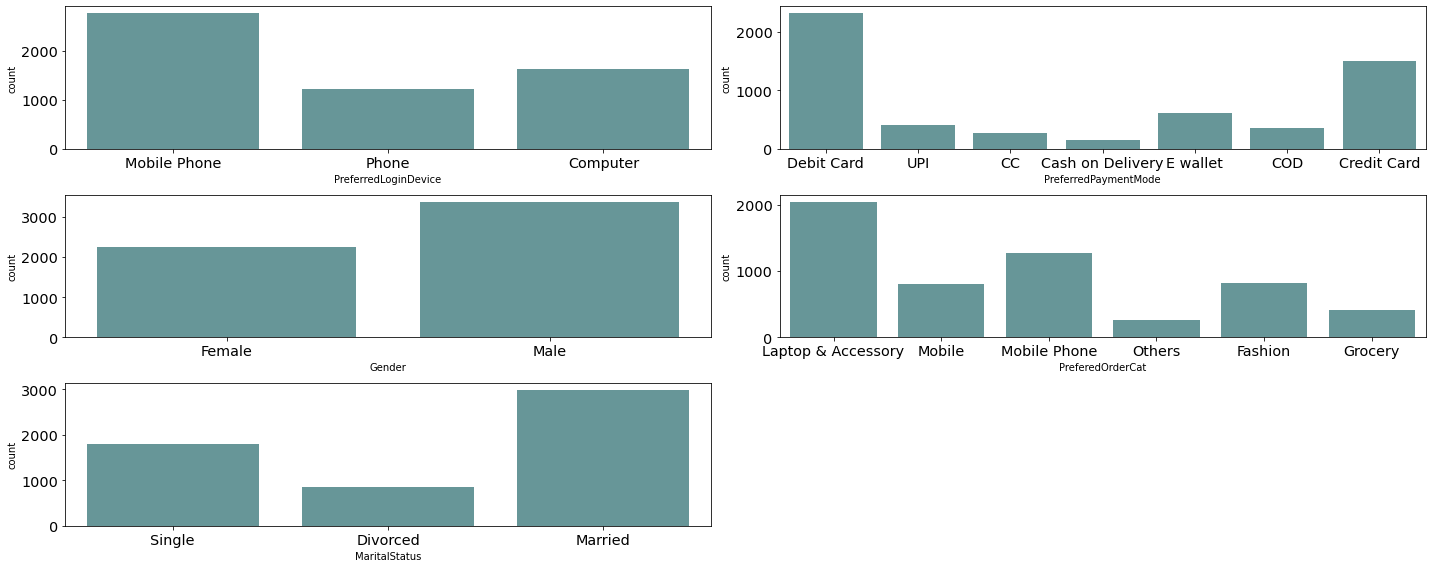

In [13]:
plt.figure(figsize=(20, 8))
for i in range(0, len(cats)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x = df[cats[i]], color='cadetblue', orient='v')
    plt.tight_layout()

Terakhir kita lihat count plot untuk setiap data. Seperti pengamatan kita sebelumnya, distribusi didominasi (proporsi lebih dari 50% dari jumlah baris data) oleh penggunaan:
- **Mobile Phone** (`PreferredLoginDevice`)
- **Male** (`Gender`)
- **Married** (`MaritalStatus`)

## 3. Bivariate Analysis

Setelah menilik setiap kolom secara individual, sekarang kita akan melihat hubungan antar kolom. Mengetahui hubungan antar kolom dapat membantu kita memilih fitur-fitur yang paling penting dan mengesampingkan *feature* yang redundan.

### Correlation heatmap

In [14]:
df.corr()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,1.000000,-0.019083,0.029952,0.003239,0.058909,0.598417,0.411098,-0.033146,0.160814,-0.009944,0.117243,0.234302,0.139008,0.113243,0.217129
Churn,-0.019083,1.000000,-0.349408,0.084703,0.076630,0.018675,0.107939,0.105481,0.043931,0.250188,-0.010058,-0.008264,-0.028697,-0.160757,-0.154118
Tenure,0.029952,-0.349408,1.000000,-0.060688,-0.018218,-0.021226,-0.023983,-0.013903,0.237666,-0.021268,0.005825,0.129035,0.186403,0.184552,0.476380
CityTier,0.003239,0.084703,-0.060688,1.000000,0.010624,-0.009150,0.027934,-0.011554,-0.029440,0.003375,-0.031408,0.021456,0.033388,0.017525,0.055746
WarehouseToHome,0.058909,0.076630,-0.018218,0.010624,1.000000,0.060990,0.019071,0.007722,-0.011020,0.028696,0.038795,-0.003935,0.002681,0.017829,-0.009200
HourSpendOnApp,0.598417,0.018675,-0.021226,-0.009150,0.060990,1.000000,0.316800,0.031858,0.145126,0.006976,0.106843,0.191528,0.109575,0.075716,0.121490
NumberOfDeviceRegistered,0.411098,0.107939,-0.023983,0.027934,0.019071,0.316800,1.000000,-0.017228,0.084997,0.003407,0.069475,0.151685,0.103464,0.018208,0.137183
SatisfactionScore,-0.033146,0.105481,-0.013903,-0.011554,0.007722,0.031858,-0.017228,1.000000,0.053583,-0.031115,-0.027730,0.017936,0.019764,0.032082,0.003473
NumberOfAddress,0.160814,0.043931,0.237666,-0.029440,-0.011020,0.145126,0.084997,0.053583,1.000000,-0.026399,0.015533,0.042120,-0.007609,-0.064847,0.186688
Complain,-0.009944,0.250188,-0.021268,0.003375,0.028696,0.006976,0.003407,-0.031115,-0.026399,1.000000,-0.004529,-0.008174,-0.019307,-0.043546,0.000525


<AxesSubplot:>

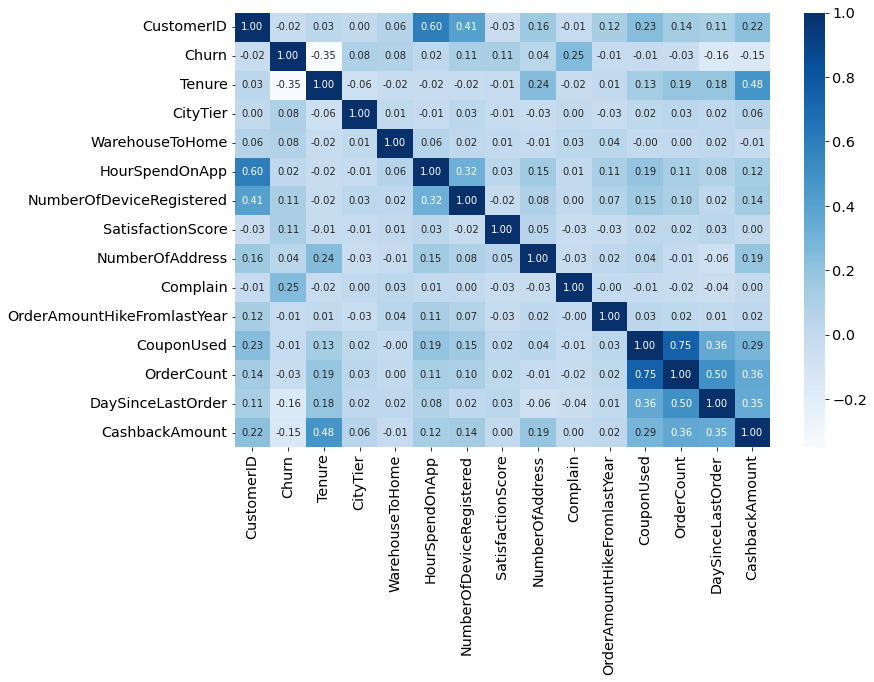

In [15]:
# correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Dari *correlation heatmap* di atas dapat dilihat bahwa:
* Target kita `churn` memiliki korelasi positif lemah dengan `Complain`, `SatisfactionScore`, dan `NumberDeviceRegistered`
* Target kita `churn` memiliki korelasi negatif lemah dengan `CashbackAmount`, `DaySinceLater`, dan `Tenure`
* `OrderCount` dengan `CouponUsed` (0.75), `Tenure` dengan `CashbackAmount` (0.48), `DaySinceLastOrder` dengan `OrderCount` (0.5) memiliki korelasi positif kuat. Ada kemungkinan kedua *feature* ini redundan, sehingga dapat dipilih salah satu saja (dan dibuang yang lainnya)
* `NumberOfDeviceRegistered` dengan `HourSpendOnApp` (0.32), `DaySinceLastOrder` dengan `CashbackAmount` (0.35), dan `DaySinceLastOrder` dengan `CouponUsed` (0.36) memiliki korelasi positif lemah.

### Pair plot

<Figure size 1080x1080 with 0 Axes>

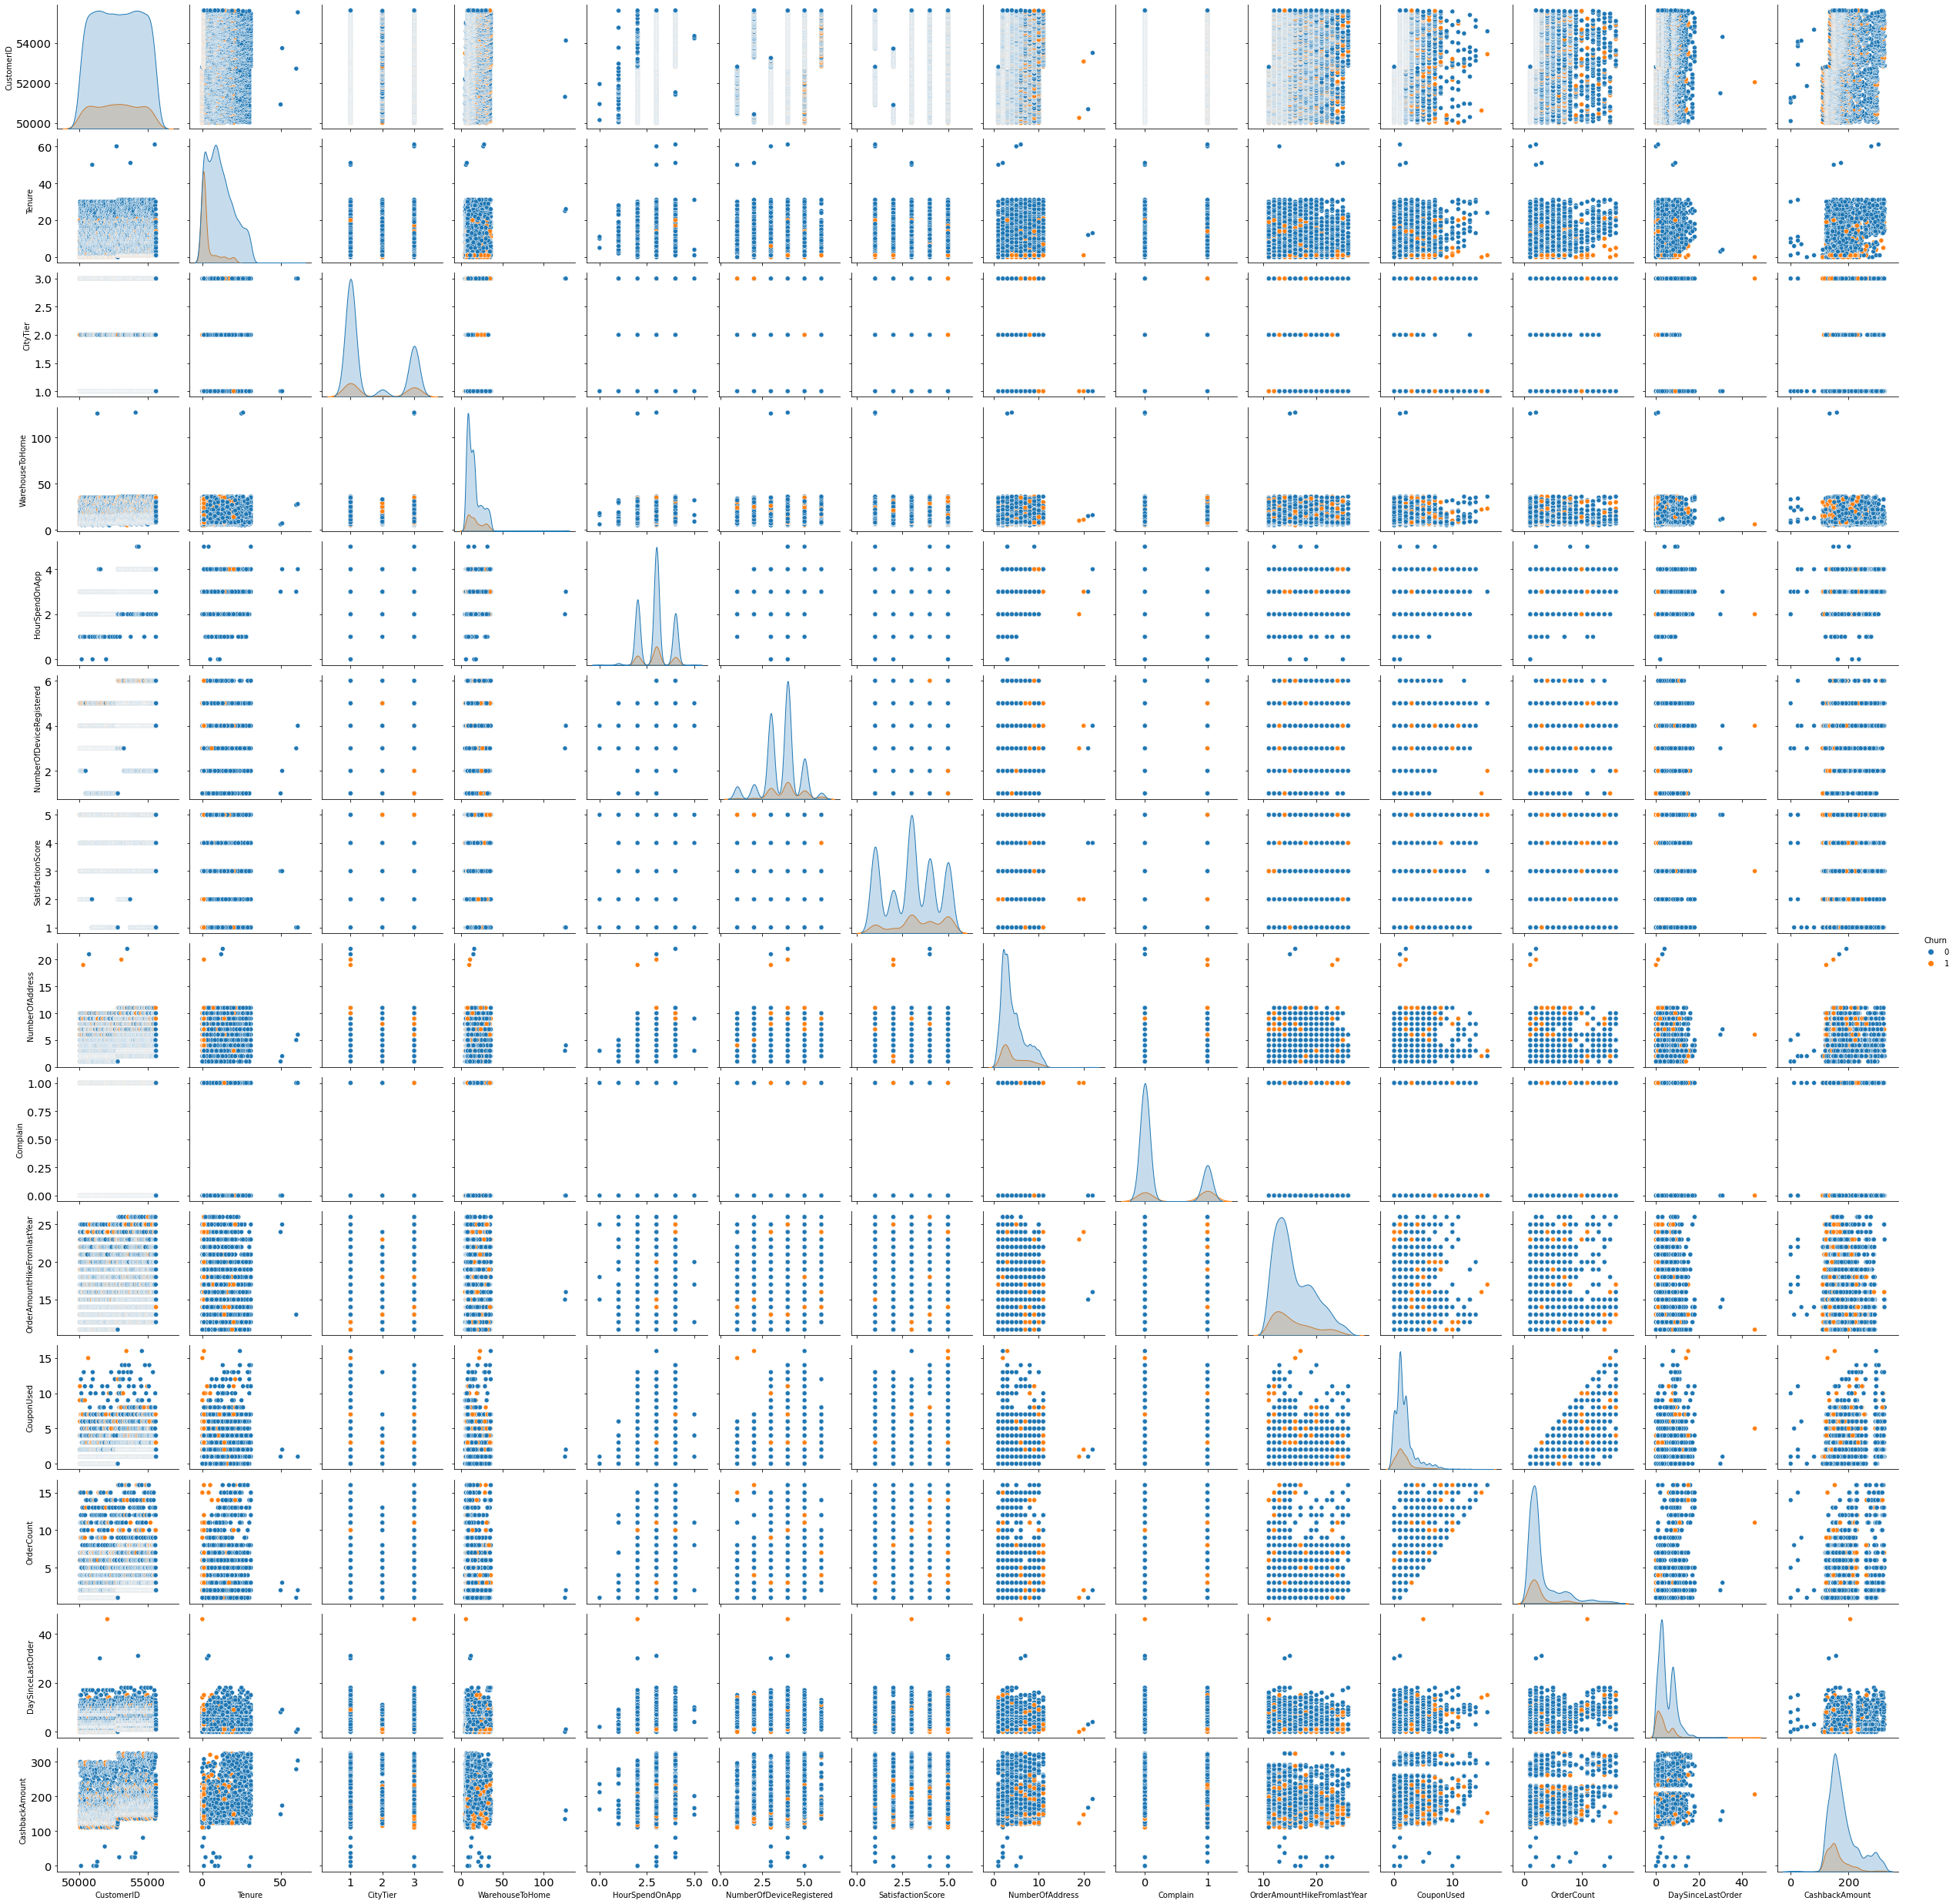

In [16]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde', hue='Churn')

### Category columns VS Target Variable

Terakhir kita selidiki hubungan fitur-fitur kategorikal dengan calon target pemodelan kita (`Churn`)

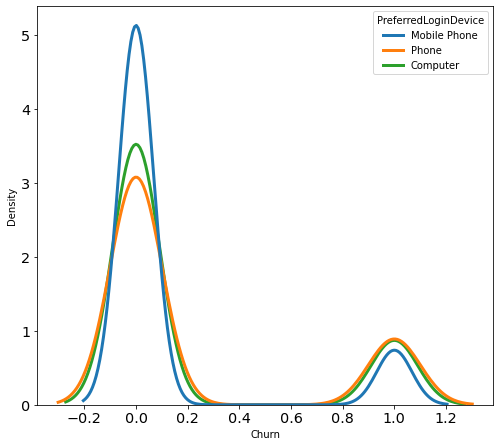

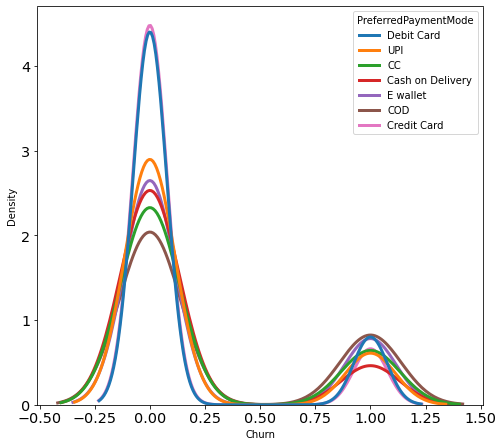

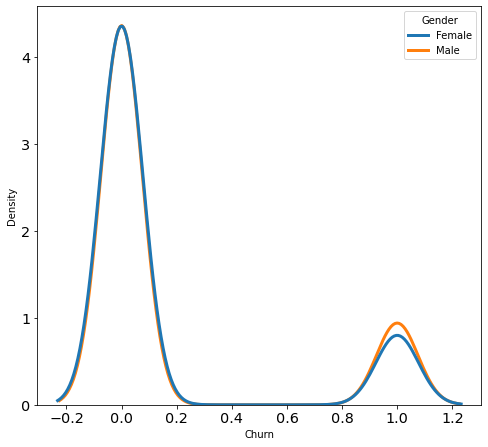

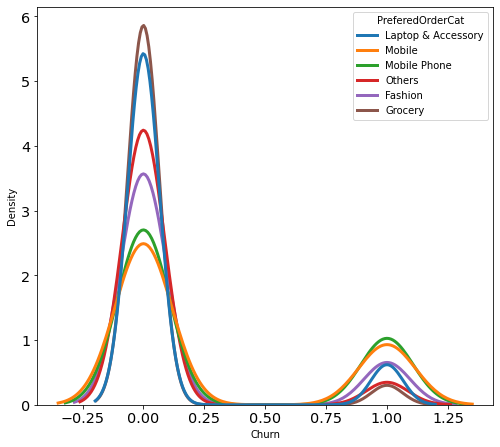

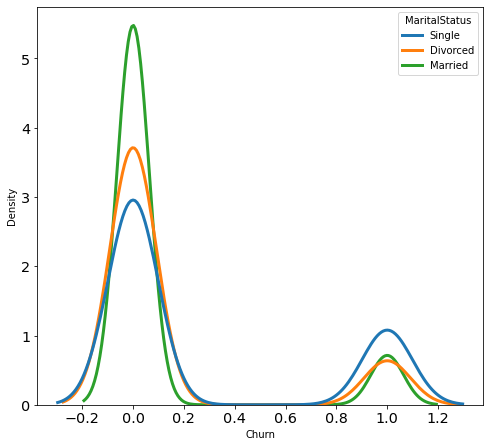

In [17]:
features = cats
for i in range(0, len(features)):
    plt.figure(figsize=(20, 12))
    plt.subplot(2, 3, i+1) 
    sns.kdeplot(data=df, x='Churn', hue=features[i], common_norm=False)
    #plt.xlabel(features[i])
    plt.tight_layout()

**Pengamatan:**
* Pengguna Mobile Phone cenderung sedikit lebih beresiko untuk churn
* Pembayaran melalui Debit Card cenderung sedikit lebih beresiko untuk churn
* Laki-laki tampaknya cenderung sedikit lebih berisiko untuk churn
* Regarding `PreferedOrderCat`, Laptop & accessory dan Mobile Phone cenderung sedikit lebih beresiko untuk churn
* Regarding `MaritalStatus`, Single cenderung sedikit lebih beresiko untuk churn

## 4. EDA Conclusion
Beberapa hal yang kita temukan dari EDA dataset ini adalah:
* Data terlihat valid dan tidak ada kecacatan yang major/signifikan
* Namun masih ada sedikit data-data yang kosong/hilang & tidak sesuai (Mobile Phone = Phone, Credit Card = CC, dan COD = Cash on Delivery, Mobile Phone=Mobile) Harus diurus ketika preprocessing
* Ada beberapa distribusi yang sedikit *skewed*, hal ini harus diingat apabila kita ingin melakukan sesuatu atau menggunakan model yang memerlukan asumsi distribusi normal
* Beberapa *feature* memiliki korelasi lemah dengan *target*, mereka akan dipakai (`Complain`, `SatisfactionScore`, `NumberDeviceRegistered`, `CashbackAmount`, `DaySinceLater`, dan `Tenure`)
* Beberapa *feature* terlihat sama sekali tidak berkorelasi, mereka sebaiknya diabaikan (`OrderCount` & `CouponUsed`, `Tenure` & `CashbackAmount`, `DaySinceLastOrder` & `OrderCount`)

# Business Insight and Recommendation

<AxesSubplot:xlabel='Tenure', ylabel='CustomerID'>

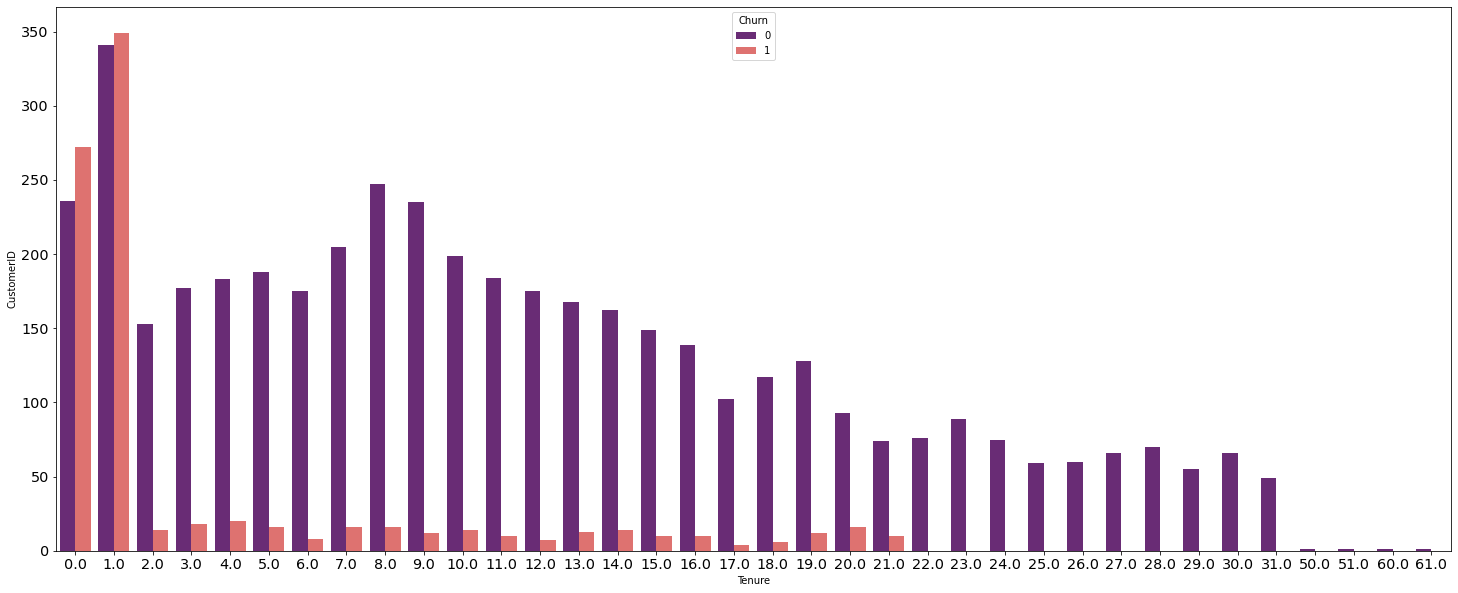

In [18]:
dfg = df.groupby(['Tenure', 'Churn'])['CustomerID'].count().reset_index()
plt.figure(figsize=(25,10))
sns.barplot(x='Tenure', y='CustomerID', data=dfg, hue='Churn', palette='magma')

Dilihat dari feature Tenure, pengguna baru yaitu pengguna yang memiliki Tenure < 1 minggu lebih beresiko untuk churn.

In [19]:
dfp = df.groupby(['Gender', 'MaritalStatus', 'Churn'])['CustomerID'].count().reset_index()
dfp

,Gender,MaritalStatus,Churn,CustomerID
0,Female,Divorced,0,300
1,Female,Divorced,1,48
2,Female,Married,0,1028
3,Female,Married,1,112
4,Female,Single,0,570
5,Female,Single,1,188
6,Male,Divorced,0,424
7,Male,Divorced,1,76
8,Male,Married,0,1614
9,Male,Married,1,232


Mayoritas customer churn berdasarkan gender dan marital status ialah laki-laki single sehingga perlu adanya spesial service untuk customer laki-laki yang masih single.

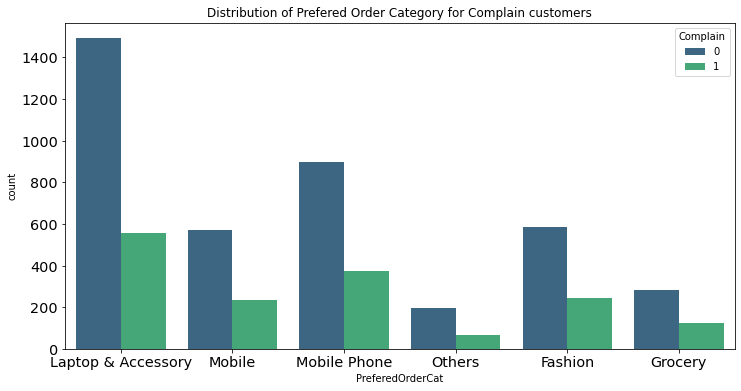

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(x='PreferedOrderCat', hue='Complain', palette='viridis', data=df)
plt.title("Distribution of Prefered Order Category for Complain customers")
plt.show()

Berdasarkan PreferredorderCat untuk kategori Laptop & Accessory memiliki complain yang lebih banyak dibandingkan kategori yang lain, sehingga beresiko untuk churn.

**1. Apa saja attributes dan target output dari dataset yang dipilih?**

**attributes:** `Complain`, `SatisfactionScore`, `CashbackAmount`, `DaySinceLastOrder`, dan `Tenure`
**target:** `Churn`

**2. Untuk setiap feature yang disiapkan, apakah sudah dicek distribusinya terhadap variabel target?**

`Complain`: tipe data boelean
`SatisfactionScore`: Normal
`CashbackAmount`: positive skewed
`DaySinceLastOrder`: positive skewed
`Tenure`: positive skewed

**3. Apakah sudah menemukan beberapa insight**
1. Dilihat dari feature `Tenure`, pengguna baru yaitu pengguna yang memiliki `Tenure` < 1 minggu lebih beresiko untuk churn.
2. Nilai rata-rata satisfaction score tergolong biasa saja (3,06 out of 5) sehingga perlu adanya peningkatan layanan agar customer tetap berlangganan.
3. Nilai rata- rata complain tergolong besar (0.28 out of 1) sehingga perlu adanya evaluasi layanan agar customer tetap berlangganan.
4. Berdasarkan `PreferredorderCat` untuk kategori Laptop & Accessory memiliki complain yang lebih banyak dibandingkan kategori yang lain, sehingga beresiko untuk churn.
5. Mayoritas customer churn berdasarkan gender dan marital status ialah laki-laki single sehingga perlu adanya spesial service untuk customer laki-laki yang masih single.